In [1]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [2]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [3]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [4]:
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

In [5]:
x_train = x_train / float(max_idx_value)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

y_train = np_utils.to_categorical(y_train)

In [7]:
one_hot_vec_size = y_train.shape[1]

In [8]:
model = Sequential()

In [9]:
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [12]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
5/5 - 0s - loss: 2.4685 - accuracy: 0.1400
Epoch 2/2000
5/5 - 0s - loss: 2.3527 - accuracy: 0.3400
Epoch 3/2000
5/5 - 0s - loss: 2.2503 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.1664 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.0893 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 2.0205 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9863 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.9443 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.9156 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.8909 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8686 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8508 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8334 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.8202 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.8029 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.7902 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.7730 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.7600 - 

Epoch 145/2000
5/5 - 0s - loss: 1.1906 - accuracy: 0.5600
Epoch 146/2000
5/5 - 0s - loss: 1.1843 - accuracy: 0.5600
Epoch 147/2000
5/5 - 0s - loss: 1.1847 - accuracy: 0.5600
Epoch 148/2000
5/5 - 0s - loss: 1.1867 - accuracy: 0.5600
Epoch 149/2000
5/5 - 0s - loss: 1.1753 - accuracy: 0.5600
Epoch 150/2000
5/5 - 0s - loss: 1.1784 - accuracy: 0.5600
Epoch 151/2000
5/5 - 0s - loss: 1.1825 - accuracy: 0.5600
Epoch 152/2000
5/5 - 0s - loss: 1.1767 - accuracy: 0.6000
Epoch 153/2000
5/5 - 0s - loss: 1.1646 - accuracy: 0.5600
Epoch 154/2000
5/5 - 0s - loss: 1.1591 - accuracy: 0.5600
Epoch 155/2000
5/5 - 0s - loss: 1.1620 - accuracy: 0.5600
Epoch 156/2000
5/5 - 0s - loss: 1.1597 - accuracy: 0.5600
Epoch 157/2000
5/5 - 0s - loss: 1.1559 - accuracy: 0.6000
Epoch 158/2000
5/5 - 0s - loss: 1.1629 - accuracy: 0.5800
Epoch 159/2000
5/5 - 0s - loss: 1.1531 - accuracy: 0.5000
Epoch 160/2000
5/5 - 0s - loss: 1.1473 - accuracy: 0.5600
Epoch 161/2000
5/5 - 0s - loss: 1.1518 - accuracy: 0.6000
Epoch 162/2000

Epoch 287/2000
5/5 - 0s - loss: 0.8704 - accuracy: 0.6400
Epoch 288/2000
5/5 - 0s - loss: 0.8693 - accuracy: 0.6400
Epoch 289/2000
5/5 - 0s - loss: 0.8762 - accuracy: 0.6200
Epoch 290/2000
5/5 - 0s - loss: 0.8693 - accuracy: 0.6600
Epoch 291/2000
5/5 - 0s - loss: 0.8673 - accuracy: 0.6600
Epoch 292/2000
5/5 - 0s - loss: 0.8662 - accuracy: 0.6400
Epoch 293/2000
5/5 - 0s - loss: 0.8694 - accuracy: 0.6400
Epoch 294/2000
5/5 - 0s - loss: 0.8607 - accuracy: 0.7200
Epoch 295/2000
5/5 - 0s - loss: 0.8659 - accuracy: 0.6400
Epoch 296/2000
5/5 - 0s - loss: 0.8546 - accuracy: 0.6600
Epoch 297/2000
5/5 - 0s - loss: 0.8473 - accuracy: 0.6600
Epoch 298/2000
5/5 - 0s - loss: 0.8572 - accuracy: 0.6400
Epoch 299/2000
5/5 - 0s - loss: 0.8594 - accuracy: 0.6600
Epoch 300/2000
5/5 - 0s - loss: 0.8486 - accuracy: 0.6400
Epoch 301/2000
5/5 - 0s - loss: 0.8472 - accuracy: 0.6200
Epoch 302/2000
5/5 - 0s - loss: 0.8435 - accuracy: 0.6400
Epoch 303/2000
5/5 - 0s - loss: 0.8449 - accuracy: 0.7000
Epoch 304/2000

Epoch 429/2000
5/5 - 0s - loss: 0.6444 - accuracy: 0.7800
Epoch 430/2000
5/5 - 0s - loss: 0.6383 - accuracy: 0.7800
Epoch 431/2000
5/5 - 0s - loss: 0.6378 - accuracy: 0.7600
Epoch 432/2000
5/5 - 0s - loss: 0.6406 - accuracy: 0.7000
Epoch 433/2000
5/5 - 0s - loss: 0.6386 - accuracy: 0.7800
Epoch 434/2000
5/5 - 0s - loss: 0.6377 - accuracy: 0.7800
Epoch 435/2000
5/5 - 0s - loss: 0.6352 - accuracy: 0.7600
Epoch 436/2000
5/5 - 0s - loss: 0.6334 - accuracy: 0.7600
Epoch 437/2000
5/5 - 0s - loss: 0.6381 - accuracy: 0.7400
Epoch 438/2000
5/5 - 0s - loss: 0.6301 - accuracy: 0.7600
Epoch 439/2000
5/5 - 0s - loss: 0.6282 - accuracy: 0.7600
Epoch 440/2000
5/5 - 0s - loss: 0.6251 - accuracy: 0.7800
Epoch 441/2000
5/5 - 0s - loss: 0.6280 - accuracy: 0.7600
Epoch 442/2000
5/5 - 0s - loss: 0.6205 - accuracy: 0.7800
Epoch 443/2000
5/5 - 0s - loss: 0.6274 - accuracy: 0.8000
Epoch 444/2000
5/5 - 0s - loss: 0.6269 - accuracy: 0.8000
Epoch 445/2000
5/5 - 0s - loss: 0.6329 - accuracy: 0.7800
Epoch 446/2000

Epoch 571/2000
5/5 - 0s - loss: 0.4954 - accuracy: 0.8600
Epoch 572/2000
5/5 - 0s - loss: 0.4856 - accuracy: 0.8400
Epoch 573/2000
5/5 - 0s - loss: 0.4904 - accuracy: 0.8600
Epoch 574/2000
5/5 - 0s - loss: 0.4844 - accuracy: 0.8600
Epoch 575/2000
5/5 - 0s - loss: 0.4816 - accuracy: 0.8800
Epoch 576/2000
5/5 - 0s - loss: 0.4790 - accuracy: 0.8400
Epoch 577/2000
5/5 - 0s - loss: 0.4834 - accuracy: 0.8200
Epoch 578/2000
5/5 - 0s - loss: 0.4930 - accuracy: 0.8000
Epoch 579/2000
5/5 - 0s - loss: 0.4778 - accuracy: 0.8400
Epoch 580/2000
5/5 - 0s - loss: 0.4845 - accuracy: 0.8400
Epoch 581/2000
5/5 - 0s - loss: 0.4735 - accuracy: 0.8600
Epoch 582/2000
5/5 - 0s - loss: 0.4992 - accuracy: 0.8400
Epoch 583/2000
5/5 - 0s - loss: 0.4826 - accuracy: 0.8400
Epoch 584/2000
5/5 - 0s - loss: 0.4820 - accuracy: 0.8600
Epoch 585/2000
5/5 - 0s - loss: 0.4809 - accuracy: 0.8600
Epoch 586/2000
5/5 - 0s - loss: 0.4713 - accuracy: 0.8600
Epoch 587/2000
5/5 - 0s - loss: 0.4718 - accuracy: 0.8400
Epoch 588/2000

Epoch 713/2000
5/5 - 0s - loss: 0.3963 - accuracy: 0.9000
Epoch 714/2000
5/5 - 0s - loss: 0.3903 - accuracy: 0.8800
Epoch 715/2000
5/5 - 0s - loss: 0.3803 - accuracy: 0.9000
Epoch 716/2000
5/5 - 0s - loss: 0.3906 - accuracy: 0.8600
Epoch 717/2000
5/5 - 0s - loss: 0.3800 - accuracy: 0.9000
Epoch 718/2000
5/5 - 0s - loss: 0.3779 - accuracy: 0.9000
Epoch 719/2000
5/5 - 0s - loss: 0.3840 - accuracy: 0.8800
Epoch 720/2000
5/5 - 0s - loss: 0.4060 - accuracy: 0.8400
Epoch 721/2000
5/5 - 0s - loss: 0.3751 - accuracy: 0.9000
Epoch 722/2000
5/5 - 0s - loss: 0.3796 - accuracy: 0.9000
Epoch 723/2000
5/5 - 0s - loss: 0.3789 - accuracy: 0.8800
Epoch 724/2000
5/5 - 0s - loss: 0.3752 - accuracy: 0.9000
Epoch 725/2000
5/5 - 0s - loss: 0.3771 - accuracy: 0.8800
Epoch 726/2000
5/5 - 0s - loss: 0.3783 - accuracy: 0.8600
Epoch 727/2000
5/5 - 0s - loss: 0.3796 - accuracy: 0.8600
Epoch 728/2000
5/5 - 0s - loss: 0.3774 - accuracy: 0.8800
Epoch 729/2000
5/5 - 0s - loss: 0.3721 - accuracy: 0.8800
Epoch 730/2000

Epoch 855/2000
5/5 - 0s - loss: 0.3063 - accuracy: 0.9200
Epoch 856/2000
5/5 - 0s - loss: 0.3016 - accuracy: 0.9200
Epoch 857/2000
5/5 - 0s - loss: 0.3151 - accuracy: 0.9000
Epoch 858/2000
5/5 - 0s - loss: 0.3103 - accuracy: 0.9200
Epoch 859/2000
5/5 - 0s - loss: 0.3151 - accuracy: 0.9200
Epoch 860/2000
5/5 - 0s - loss: 0.3060 - accuracy: 0.9200
Epoch 861/2000
5/5 - 0s - loss: 0.3053 - accuracy: 0.9200
Epoch 862/2000
5/5 - 0s - loss: 0.3118 - accuracy: 0.9200
Epoch 863/2000
5/5 - 0s - loss: 0.3072 - accuracy: 0.9200
Epoch 864/2000
5/5 - 0s - loss: 0.3039 - accuracy: 0.9000
Epoch 865/2000
5/5 - 0s - loss: 0.3040 - accuracy: 0.9000
Epoch 866/2000
5/5 - 0s - loss: 0.3045 - accuracy: 0.9200
Epoch 867/2000
5/5 - 0s - loss: 0.3022 - accuracy: 0.9200
Epoch 868/2000
5/5 - 0s - loss: 0.3064 - accuracy: 0.9200
Epoch 869/2000
5/5 - 0s - loss: 0.3052 - accuracy: 0.9000
Epoch 870/2000
5/5 - 0s - loss: 0.3110 - accuracy: 0.8800
Epoch 871/2000
5/5 - 0s - loss: 0.3049 - accuracy: 0.9400
Epoch 872/2000

Epoch 997/2000
5/5 - 0s - loss: 0.2740 - accuracy: 0.9200
Epoch 998/2000
5/5 - 0s - loss: 0.2555 - accuracy: 0.9400
Epoch 999/2000
5/5 - 0s - loss: 0.2730 - accuracy: 0.9200
Epoch 1000/2000
5/5 - 0s - loss: 0.2787 - accuracy: 0.9000
Epoch 1001/2000
5/5 - 0s - loss: 0.2597 - accuracy: 0.9000
Epoch 1002/2000
5/5 - 0s - loss: 0.2696 - accuracy: 0.8800
Epoch 1003/2000
5/5 - 0s - loss: 0.2769 - accuracy: 0.9200
Epoch 1004/2000
5/5 - 0s - loss: 0.2614 - accuracy: 0.9200
Epoch 1005/2000
5/5 - 0s - loss: 0.2528 - accuracy: 0.9200
Epoch 1006/2000
5/5 - 0s - loss: 0.2594 - accuracy: 0.9200
Epoch 1007/2000
5/5 - 0s - loss: 0.2572 - accuracy: 0.9400
Epoch 1008/2000
5/5 - 0s - loss: 0.2728 - accuracy: 0.9000
Epoch 1009/2000
5/5 - 0s - loss: 0.2555 - accuracy: 0.9400
Epoch 1010/2000
5/5 - 0s - loss: 0.2798 - accuracy: 0.9000
Epoch 1011/2000
5/5 - 0s - loss: 0.2607 - accuracy: 0.9200
Epoch 1012/2000
5/5 - 0s - loss: 0.2573 - accuracy: 0.9000
Epoch 1013/2000
5/5 - 0s - loss: 0.2575 - accuracy: 0.9000


Epoch 1136/2000
5/5 - 0s - loss: 0.2274 - accuracy: 0.9200
Epoch 1137/2000
5/5 - 0s - loss: 0.2303 - accuracy: 0.9000
Epoch 1138/2000
5/5 - 0s - loss: 0.2274 - accuracy: 0.9200
Epoch 1139/2000
5/5 - 0s - loss: 0.2260 - accuracy: 0.9000
Epoch 1140/2000
5/5 - 0s - loss: 0.2229 - accuracy: 0.9000
Epoch 1141/2000
5/5 - 0s - loss: 0.2206 - accuracy: 0.9200
Epoch 1142/2000
5/5 - 0s - loss: 0.2265 - accuracy: 0.9200
Epoch 1143/2000
5/5 - 0s - loss: 0.2201 - accuracy: 0.9200
Epoch 1144/2000
5/5 - 0s - loss: 0.2580 - accuracy: 0.8400
Epoch 1145/2000
5/5 - 0s - loss: 0.2186 - accuracy: 0.9000
Epoch 1146/2000
5/5 - 0s - loss: 0.2382 - accuracy: 0.9200
Epoch 1147/2000
5/5 - 0s - loss: 0.2224 - accuracy: 0.9200
Epoch 1148/2000
5/5 - 0s - loss: 0.2404 - accuracy: 0.9200
Epoch 1149/2000
5/5 - 0s - loss: 0.2324 - accuracy: 0.9200
Epoch 1150/2000
5/5 - 0s - loss: 0.2325 - accuracy: 0.9200
Epoch 1151/2000
5/5 - 0s - loss: 0.2260 - accuracy: 0.9000
Epoch 1152/2000
5/5 - 0s - loss: 0.2219 - accuracy: 0.90

Epoch 1275/2000
5/5 - 0s - loss: 0.2115 - accuracy: 0.9200
Epoch 1276/2000
5/5 - 0s - loss: 0.2080 - accuracy: 0.9000
Epoch 1277/2000
5/5 - 0s - loss: 0.2034 - accuracy: 0.8800
Epoch 1278/2000
5/5 - 0s - loss: 0.1998 - accuracy: 0.9000
Epoch 1279/2000
5/5 - 0s - loss: 0.2135 - accuracy: 0.9200
Epoch 1280/2000
5/5 - 0s - loss: 0.2087 - accuracy: 0.9000
Epoch 1281/2000
5/5 - 0s - loss: 0.2023 - accuracy: 0.9000
Epoch 1282/2000
5/5 - 0s - loss: 0.2032 - accuracy: 0.9200
Epoch 1283/2000
5/5 - 0s - loss: 0.2039 - accuracy: 0.9200
Epoch 1284/2000
5/5 - 0s - loss: 0.2156 - accuracy: 0.9200
Epoch 1285/2000
5/5 - 0s - loss: 0.1958 - accuracy: 0.9400
Epoch 1286/2000
5/5 - 0s - loss: 0.2032 - accuracy: 0.9200
Epoch 1287/2000
5/5 - 0s - loss: 0.1967 - accuracy: 0.9200
Epoch 1288/2000
5/5 - 0s - loss: 0.2094 - accuracy: 0.9000
Epoch 1289/2000
5/5 - 0s - loss: 0.1966 - accuracy: 0.9200
Epoch 1290/2000
5/5 - 0s - loss: 0.2013 - accuracy: 0.9200
Epoch 1291/2000
5/5 - 0s - loss: 0.1988 - accuracy: 0.90

Epoch 1414/2000
5/5 - 0s - loss: 0.1844 - accuracy: 0.9000
Epoch 1415/2000
5/5 - 0s - loss: 0.1790 - accuracy: 0.9200
Epoch 1416/2000
5/5 - 0s - loss: 0.1798 - accuracy: 0.9200
Epoch 1417/2000
5/5 - 0s - loss: 0.1838 - accuracy: 0.9000
Epoch 1418/2000
5/5 - 0s - loss: 0.1797 - accuracy: 0.9000
Epoch 1419/2000
5/5 - 0s - loss: 0.1818 - accuracy: 0.9400
Epoch 1420/2000
5/5 - 0s - loss: 0.1805 - accuracy: 0.9200
Epoch 1421/2000
5/5 - 0s - loss: 0.1814 - accuracy: 0.9000
Epoch 1422/2000
5/5 - 0s - loss: 0.1792 - accuracy: 0.9200
Epoch 1423/2000
5/5 - 0s - loss: 0.1882 - accuracy: 0.9200
Epoch 1424/2000
5/5 - 0s - loss: 0.1784 - accuracy: 0.9200
Epoch 1425/2000
5/5 - 0s - loss: 0.1914 - accuracy: 0.9200
Epoch 1426/2000
5/5 - 0s - loss: 0.1836 - accuracy: 0.9000
Epoch 1427/2000
5/5 - 0s - loss: 0.1935 - accuracy: 0.9200
Epoch 1428/2000
5/5 - 0s - loss: 0.1874 - accuracy: 0.9000
Epoch 1429/2000
5/5 - 0s - loss: 0.1863 - accuracy: 0.9200
Epoch 1430/2000
5/5 - 0s - loss: 0.1815 - accuracy: 0.94

Epoch 1553/2000
5/5 - 0s - loss: 0.1725 - accuracy: 0.9000
Epoch 1554/2000
5/5 - 0s - loss: 0.1840 - accuracy: 0.8800
Epoch 1555/2000
5/5 - 0s - loss: 0.1681 - accuracy: 0.9200
Epoch 1556/2000
5/5 - 0s - loss: 0.1702 - accuracy: 0.8800
Epoch 1557/2000
5/5 - 0s - loss: 0.1761 - accuracy: 0.9200
Epoch 1558/2000
5/5 - 0s - loss: 0.1702 - accuracy: 0.9200
Epoch 1559/2000
5/5 - 0s - loss: 0.1719 - accuracy: 0.9000
Epoch 1560/2000
5/5 - 0s - loss: 0.1659 - accuracy: 0.9200
Epoch 1561/2000
5/5 - 0s - loss: 0.1857 - accuracy: 0.9000
Epoch 1562/2000
5/5 - 0s - loss: 0.1829 - accuracy: 0.9000
Epoch 1563/2000
5/5 - 0s - loss: 0.1736 - accuracy: 0.9400
Epoch 1564/2000
5/5 - 0s - loss: 0.1971 - accuracy: 0.8800
Epoch 1565/2000
5/5 - 0s - loss: 0.1690 - accuracy: 0.9200
Epoch 1566/2000
5/5 - 0s - loss: 0.1852 - accuracy: 0.9200
Epoch 1567/2000
5/5 - 0s - loss: 0.1740 - accuracy: 0.9000
Epoch 1568/2000
5/5 - 0s - loss: 0.1713 - accuracy: 0.8600
Epoch 1569/2000
5/5 - 0s - loss: 0.1695 - accuracy: 0.88

Epoch 1692/2000
5/5 - 0s - loss: 0.1611 - accuracy: 0.9000
Epoch 1693/2000
5/5 - 0s - loss: 0.1665 - accuracy: 0.9200
Epoch 1694/2000
5/5 - 0s - loss: 0.1773 - accuracy: 0.9200
Epoch 1695/2000
5/5 - 0s - loss: 0.1677 - accuracy: 0.8800
Epoch 1696/2000
5/5 - 0s - loss: 0.1606 - accuracy: 0.9000
Epoch 1697/2000
5/5 - 0s - loss: 0.1588 - accuracy: 0.8800
Epoch 1698/2000
5/5 - 0s - loss: 0.1633 - accuracy: 0.9000
Epoch 1699/2000
5/5 - 0s - loss: 0.1613 - accuracy: 0.9200
Epoch 1700/2000
5/5 - 0s - loss: 0.1692 - accuracy: 0.9000
Epoch 1701/2000
5/5 - 0s - loss: 0.1637 - accuracy: 0.9200
Epoch 1702/2000
5/5 - 0s - loss: 0.1577 - accuracy: 0.9000
Epoch 1703/2000
5/5 - 0s - loss: 0.1618 - accuracy: 0.9200
Epoch 1704/2000
5/5 - 0s - loss: 0.1556 - accuracy: 0.9200
Epoch 1705/2000
5/5 - 0s - loss: 0.1625 - accuracy: 0.9200
Epoch 1706/2000
5/5 - 0s - loss: 0.1675 - accuracy: 0.9000
Epoch 1707/2000
5/5 - 0s - loss: 0.1601 - accuracy: 0.9000
Epoch 1708/2000
5/5 - 0s - loss: 0.1585 - accuracy: 0.92

Epoch 1831/2000
5/5 - 0s - loss: 0.1574 - accuracy: 0.9000
Epoch 1832/2000
5/5 - 0s - loss: 0.1546 - accuracy: 0.9200
Epoch 1833/2000
5/5 - 0s - loss: 0.1535 - accuracy: 0.8800
Epoch 1834/2000
5/5 - 0s - loss: 0.1507 - accuracy: 0.9000
Epoch 1835/2000
5/5 - 0s - loss: 0.1529 - accuracy: 0.9000
Epoch 1836/2000
5/5 - 0s - loss: 0.1449 - accuracy: 0.9200
Epoch 1837/2000
5/5 - 0s - loss: 0.1566 - accuracy: 0.9000
Epoch 1838/2000
5/5 - 0s - loss: 0.1574 - accuracy: 0.9200
Epoch 1839/2000
5/5 - 0s - loss: 0.1643 - accuracy: 0.9000
Epoch 1840/2000
5/5 - 0s - loss: 0.1581 - accuracy: 0.9200
Epoch 1841/2000
5/5 - 0s - loss: 0.1472 - accuracy: 0.9200
Epoch 1842/2000
5/5 - 0s - loss: 0.1587 - accuracy: 0.9200
Epoch 1843/2000
5/5 - 0s - loss: 0.1557 - accuracy: 0.9200
Epoch 1844/2000
5/5 - 0s - loss: 0.1568 - accuracy: 0.9200
Epoch 1845/2000
5/5 - 0s - loss: 0.1591 - accuracy: 0.9000
Epoch 1846/2000
5/5 - 0s - loss: 0.1722 - accuracy: 0.9200
Epoch 1847/2000
5/5 - 0s - loss: 0.1548 - accuracy: 0.92

Epoch 1970/2000
5/5 - 0s - loss: 0.1652 - accuracy: 0.9200
Epoch 1971/2000
5/5 - 0s - loss: 0.1542 - accuracy: 0.8800
Epoch 1972/2000
5/5 - 0s - loss: 0.1726 - accuracy: 0.9000
Epoch 1973/2000
5/5 - 0s - loss: 0.1542 - accuracy: 0.9000
Epoch 1974/2000
5/5 - 0s - loss: 0.1551 - accuracy: 0.9200
Epoch 1975/2000
5/5 - 0s - loss: 0.1599 - accuracy: 0.9200
Epoch 1976/2000
5/5 - 0s - loss: 0.1409 - accuracy: 0.9400
Epoch 1977/2000
5/5 - 0s - loss: 0.1513 - accuracy: 0.9200
Epoch 1978/2000
5/5 - 0s - loss: 0.1503 - accuracy: 0.9000
Epoch 1979/2000
5/5 - 0s - loss: 0.1497 - accuracy: 0.9000
Epoch 1980/2000
5/5 - 0s - loss: 0.1448 - accuracy: 0.9200
Epoch 1981/2000
5/5 - 0s - loss: 0.1460 - accuracy: 0.9200
Epoch 1982/2000
5/5 - 0s - loss: 0.1504 - accuracy: 0.9000
Epoch 1983/2000
5/5 - 0s - loss: 0.1464 - accuracy: 0.9000
Epoch 1984/2000
5/5 - 0s - loss: 0.1467 - accuracy: 0.9000
Epoch 1985/2000
5/5 - 0s - loss: 0.1518 - accuracy: 0.8800
Epoch 1986/2000
5/5 - 0s - loss: 0.1566 - accuracy: 0.88

In [13]:
history.losses

[2.468519449234009,
 2.3526787757873535,
 2.2502541542053223,
 2.166365385055542,
 2.0892598628997803,
 2.0205013751983643,
 1.9862709045410156,
 1.944307565689087,
 1.9156094789505005,
 1.8909096717834473,
 1.8685778379440308,
 1.85078763961792,
 1.8333959579467773,
 1.8202273845672607,
 1.802854299545288,
 1.790183424949646,
 1.7730144262313843,
 1.7600458860397339,
 1.7458401918411255,
 1.734563946723938,
 1.7212735414505005,
 1.7108557224273682,
 1.698797345161438,
 1.6853179931640625,
 1.6747937202453613,
 1.668207049369812,
 1.6556048393249512,
 1.6456314325332642,
 1.6353826522827148,
 1.6280694007873535,
 1.615127682685852,
 1.6067688465118408,
 1.6021411418914795,
 1.5964694023132324,
 1.5845178365707397,
 1.5826541185379028,
 1.5736874341964722,
 1.5634405612945557,
 1.5606330633163452,
 1.548083782196045,
 1.5488537549972534,
 1.5444072484970093,
 1.537890911102295,
 1.5288692712783813,
 1.5289416313171387,
 1.522009015083313,
 1.518827199935913,
 1.5174241065979004,
 1.5100

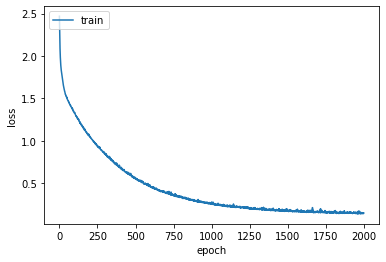

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 997us/step - loss: 0.1411 - accuracy: 0.9200
accuracy: 92.00%


In [16]:
pred_count = 50

In [17]:
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

In [18]:
pred_out

array([[1.93189453e-15, 3.60355409e-25, 4.02348046e-38, 1.05122577e-09,
        1.25709497e-20, 6.01276237e-16, 2.46917701e-16, 3.35265692e-27,
        9.98811007e-01, 1.18902070e-03, 5.72862623e-16, 6.83597940e-15],
       [5.30114190e-12, 9.98777807e-01, 2.83898058e-04, 7.89812053e-12,
        3.12401302e-14, 1.48338763e-12, 1.95311822e-12, 6.64930722e-32,
        1.26868181e-04, 8.11074104e-04, 3.58440360e-07, 7.96914423e-10],
       [3.81443098e-12, 7.29043801e-19, 9.49941641e-28, 0.00000000e+00,
        1.75078300e-38, 5.01498183e-11, 4.05732288e-11, 9.99558628e-01,
        5.48562014e-08, 1.56891971e-07, 4.41279379e-04, 7.91025977e-14],
       [1.61107090e-13, 1.26179547e-16, 4.26546970e-33, 3.30506822e-08,
        3.25174845e-20, 1.96122212e-13, 1.88310078e-14, 1.92879249e-16,
        3.32729697e-01, 6.67270243e-01, 2.11665169e-16, 4.20459096e-21],
       [2.15887663e-09, 1.08514678e-05, 2.99170105e-16, 1.88680943e-07,
        7.77909130e-15, 5.82868587e-10, 9.99467509e-10, 2.36

In [19]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

In [20]:
seq_in=[code2idx[it]/float(max_idx_value) for it in seq_in]

In [21]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


In [22]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [23]:
# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [24]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [25]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [26]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [27]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/2000
4/4 - 0s - loss: 2.4696 - accuracy: 0.1400
Epoch 2/2000
4/4 - 0s - loss: 2.4271 - accuracy: 0.3400
Epoch 3/2000
4/4 - 0s - loss: 2.3837 - accuracy: 0.3400
Epoch 4/2000
4/4 - 0s - loss: 2.3342 - accuracy: 0.3400
Epoch 5/2000
4/4 - 0s - loss: 2.2806 - accuracy: 0.3400
Epoch 6/2000
4/4 - 0s - loss: 2.2059 - accuracy: 0.3400
Epoch 7/2000
4/4 - 0s - loss: 2.1188 - accuracy: 0.3400
Epoch 8/2000
4/4 - 0s - loss: 2.0518 - accuracy: 0.3400
Epoch 9/2000
4/4 - 0s - loss: 1.9781 - accuracy: 0.3400
Epoch 10/2000
4/4 - 0s - loss: 1.9543 - accuracy: 0.3400
Epoch 11/2000
4/4 - 0s - loss: 1.9596 - accuracy: 0.3400
Epoch 12/2000
4/4 - 0s - loss: 1.9623 - accuracy: 0.3400
Epoch 13/2000
4/4 - 0s - loss: 1.9386 - accuracy: 0.3400
Epoch 14/2000
4/4 - 0s - loss: 1.9263 - accuracy: 0.3400
Epoch 15/2000
4/4 - 0s - loss: 1.9215 - accuracy: 0.3400
Epoch 16/2000
4/4 - 0s - loss: 1.9174 - accuracy: 0.3400
Epoch 17/2000
4/4 - 0s - loss: 1.9124 - accuracy: 0.3400
Epoch 18/2000
4/4 - 0s - loss: 1.9105 - 

Epoch 145/2000
4/4 - 0s - loss: 1.6279 - accuracy: 0.4000
Epoch 146/2000
4/4 - 0s - loss: 1.6434 - accuracy: 0.4200
Epoch 147/2000
4/4 - 0s - loss: 1.6263 - accuracy: 0.4400
Epoch 148/2000
4/4 - 0s - loss: 1.6172 - accuracy: 0.4400
Epoch 149/2000
4/4 - 0s - loss: 1.6152 - accuracy: 0.4200
Epoch 150/2000
4/4 - 0s - loss: 1.6120 - accuracy: 0.4200
Epoch 151/2000
4/4 - 0s - loss: 1.6184 - accuracy: 0.4600
Epoch 152/2000
4/4 - 0s - loss: 1.6146 - accuracy: 0.4400
Epoch 153/2000
4/4 - 0s - loss: 1.6119 - accuracy: 0.4400
Epoch 154/2000
4/4 - 0s - loss: 1.6025 - accuracy: 0.4400
Epoch 155/2000
4/4 - 0s - loss: 1.6069 - accuracy: 0.3800
Epoch 156/2000
4/4 - 0s - loss: 1.5950 - accuracy: 0.4000
Epoch 157/2000
4/4 - 0s - loss: 1.6091 - accuracy: 0.4200
Epoch 158/2000
4/4 - 0s - loss: 1.6024 - accuracy: 0.4400
Epoch 159/2000
4/4 - 0s - loss: 1.5884 - accuracy: 0.4000
Epoch 160/2000
4/4 - 0s - loss: 1.5986 - accuracy: 0.4200
Epoch 161/2000
4/4 - 0s - loss: 1.5963 - accuracy: 0.4200
Epoch 162/2000

4/4 - 0s - loss: 1.2707 - accuracy: 0.5400
Epoch 287/2000
4/4 - 0s - loss: 1.2955 - accuracy: 0.5600
Epoch 288/2000
4/4 - 0s - loss: 1.2856 - accuracy: 0.5000
Epoch 289/2000
4/4 - 0s - loss: 1.2694 - accuracy: 0.5200
Epoch 290/2000
4/4 - 0s - loss: 1.2612 - accuracy: 0.4800
Epoch 291/2000
4/4 - 0s - loss: 1.2674 - accuracy: 0.5600
Epoch 292/2000
4/4 - 0s - loss: 1.2775 - accuracy: 0.5600
Epoch 293/2000
4/4 - 0s - loss: 1.2570 - accuracy: 0.5400
Epoch 294/2000
4/4 - 0s - loss: 1.2546 - accuracy: 0.5000
Epoch 295/2000
4/4 - 0s - loss: 1.2666 - accuracy: 0.5200
Epoch 296/2000
4/4 - 0s - loss: 1.2540 - accuracy: 0.5600
Epoch 297/2000
4/4 - 0s - loss: 1.2688 - accuracy: 0.5400
Epoch 298/2000
4/4 - 0s - loss: 1.2622 - accuracy: 0.5000
Epoch 299/2000
4/4 - 0s - loss: 1.2541 - accuracy: 0.5800
Epoch 300/2000
4/4 - 0s - loss: 1.2698 - accuracy: 0.5200
Epoch 301/2000
4/4 - 0s - loss: 1.2719 - accuracy: 0.5200
Epoch 302/2000
4/4 - 0s - loss: 1.2792 - accuracy: 0.5000
Epoch 303/2000
4/4 - 0s - los

Epoch 428/2000
4/4 - 0s - loss: 1.0239 - accuracy: 0.5800
Epoch 429/2000
4/4 - 0s - loss: 1.0092 - accuracy: 0.6000
Epoch 430/2000
4/4 - 0s - loss: 1.0427 - accuracy: 0.6200
Epoch 431/2000
4/4 - 0s - loss: 1.0407 - accuracy: 0.6000
Epoch 432/2000
4/4 - 0s - loss: 1.0521 - accuracy: 0.5600
Epoch 433/2000
4/4 - 0s - loss: 1.0010 - accuracy: 0.5800
Epoch 434/2000
4/4 - 0s - loss: 1.0567 - accuracy: 0.5800
Epoch 435/2000
4/4 - 0s - loss: 1.0489 - accuracy: 0.5800
Epoch 436/2000
4/4 - 0s - loss: 1.0436 - accuracy: 0.6400
Epoch 437/2000
4/4 - 0s - loss: 1.0066 - accuracy: 0.6200
Epoch 438/2000
4/4 - 0s - loss: 1.0062 - accuracy: 0.5800
Epoch 439/2000
4/4 - 0s - loss: 1.0058 - accuracy: 0.6200
Epoch 440/2000
4/4 - 0s - loss: 0.9940 - accuracy: 0.6200
Epoch 441/2000
4/4 - 0s - loss: 1.0059 - accuracy: 0.6000
Epoch 442/2000
4/4 - 0s - loss: 0.9948 - accuracy: 0.6000
Epoch 443/2000
4/4 - 0s - loss: 0.9958 - accuracy: 0.6000
Epoch 444/2000
4/4 - 0s - loss: 0.9965 - accuracy: 0.6600
Epoch 445/2000

Epoch 570/2000
4/4 - 0s - loss: 0.7921 - accuracy: 0.6800
Epoch 571/2000
4/4 - 0s - loss: 0.8512 - accuracy: 0.6400
Epoch 572/2000
4/4 - 0s - loss: 0.8133 - accuracy: 0.7000
Epoch 573/2000
4/4 - 0s - loss: 0.8112 - accuracy: 0.6800
Epoch 574/2000
4/4 - 0s - loss: 0.8064 - accuracy: 0.6200
Epoch 575/2000
4/4 - 0s - loss: 0.7793 - accuracy: 0.6600
Epoch 576/2000
4/4 - 0s - loss: 0.7888 - accuracy: 0.6600
Epoch 577/2000
4/4 - 0s - loss: 0.7762 - accuracy: 0.6800
Epoch 578/2000
4/4 - 0s - loss: 0.7962 - accuracy: 0.6800
Epoch 579/2000
4/4 - 0s - loss: 0.7949 - accuracy: 0.6400
Epoch 580/2000
4/4 - 0s - loss: 0.7609 - accuracy: 0.7200
Epoch 581/2000
4/4 - 0s - loss: 0.8272 - accuracy: 0.6200
Epoch 582/2000
4/4 - 0s - loss: 0.8083 - accuracy: 0.6800
Epoch 583/2000
4/4 - 0s - loss: 0.7923 - accuracy: 0.6800
Epoch 584/2000
4/4 - 0s - loss: 0.8231 - accuracy: 0.6400
Epoch 585/2000
4/4 - 0s - loss: 0.7697 - accuracy: 0.6800
Epoch 586/2000
4/4 - 0s - loss: 0.7642 - accuracy: 0.6600
Epoch 587/2000

Epoch 712/2000
4/4 - 0s - loss: 0.6344 - accuracy: 0.7800
Epoch 713/2000
4/4 - 0s - loss: 0.6163 - accuracy: 0.8000
Epoch 714/2000
4/4 - 0s - loss: 0.6344 - accuracy: 0.7800
Epoch 715/2000
4/4 - 0s - loss: 0.5992 - accuracy: 0.8000
Epoch 716/2000
4/4 - 0s - loss: 0.6485 - accuracy: 0.8000
Epoch 717/2000
4/4 - 0s - loss: 0.6168 - accuracy: 0.8200
Epoch 718/2000
4/4 - 0s - loss: 0.6310 - accuracy: 0.7800
Epoch 719/2000
4/4 - 0s - loss: 0.6484 - accuracy: 0.7800
Epoch 720/2000
4/4 - 0s - loss: 0.6009 - accuracy: 0.8200
Epoch 721/2000
4/4 - 0s - loss: 0.6330 - accuracy: 0.7800
Epoch 722/2000
4/4 - 0s - loss: 0.6618 - accuracy: 0.7600
Epoch 723/2000
4/4 - 0s - loss: 0.6276 - accuracy: 0.7600
Epoch 724/2000
4/4 - 0s - loss: 0.6200 - accuracy: 0.8000
Epoch 725/2000
4/4 - 0s - loss: 0.6290 - accuracy: 0.7800
Epoch 726/2000
4/4 - 0s - loss: 0.6126 - accuracy: 0.8400
Epoch 727/2000
4/4 - 0s - loss: 0.6171 - accuracy: 0.7800
Epoch 728/2000
4/4 - 0s - loss: 0.6110 - accuracy: 0.8000
Epoch 729/2000

Epoch 854/2000
4/4 - 0s - loss: 0.5182 - accuracy: 0.8200
Epoch 855/2000
4/4 - 0s - loss: 0.5248 - accuracy: 0.8200
Epoch 856/2000
4/4 - 0s - loss: 0.5079 - accuracy: 0.8400
Epoch 857/2000
4/4 - 0s - loss: 0.5236 - accuracy: 0.8200
Epoch 858/2000
4/4 - 0s - loss: 0.5505 - accuracy: 0.8200
Epoch 859/2000
4/4 - 0s - loss: 0.4990 - accuracy: 0.8400
Epoch 860/2000
4/4 - 0s - loss: 0.5709 - accuracy: 0.7600
Epoch 861/2000
4/4 - 0s - loss: 0.5338 - accuracy: 0.8000
Epoch 862/2000
4/4 - 0s - loss: 0.5085 - accuracy: 0.8200
Epoch 863/2000
4/4 - 0s - loss: 0.5419 - accuracy: 0.8400
Epoch 864/2000
4/4 - 0s - loss: 0.6016 - accuracy: 0.7800
Epoch 865/2000
4/4 - 0s - loss: 0.6658 - accuracy: 0.7600
Epoch 866/2000
4/4 - 0s - loss: 0.5344 - accuracy: 0.7800
Epoch 867/2000
4/4 - 0s - loss: 0.5787 - accuracy: 0.7800
Epoch 868/2000
4/4 - 0s - loss: 0.5358 - accuracy: 0.7600
Epoch 869/2000
4/4 - 0s - loss: 0.5110 - accuracy: 0.7800
Epoch 870/2000
4/4 - 0s - loss: 0.5096 - accuracy: 0.8200
Epoch 871/2000

Epoch 996/2000
4/4 - 0s - loss: 0.4404 - accuracy: 0.8400
Epoch 997/2000
4/4 - 0s - loss: 0.4878 - accuracy: 0.8000
Epoch 998/2000
4/4 - 0s - loss: 0.5166 - accuracy: 0.8200
Epoch 999/2000
4/4 - 0s - loss: 0.4338 - accuracy: 0.8600
Epoch 1000/2000
4/4 - 0s - loss: 0.4849 - accuracy: 0.8000
Epoch 1001/2000
4/4 - 0s - loss: 0.4477 - accuracy: 0.8800
Epoch 1002/2000
4/4 - 0s - loss: 0.4427 - accuracy: 0.8600
Epoch 1003/2000
4/4 - 0s - loss: 0.4582 - accuracy: 0.8200
Epoch 1004/2000
4/4 - 0s - loss: 0.4398 - accuracy: 0.8600
Epoch 1005/2000
4/4 - 0s - loss: 0.4508 - accuracy: 0.8600
Epoch 1006/2000
4/4 - 0s - loss: 0.4507 - accuracy: 0.8400
Epoch 1007/2000
4/4 - 0s - loss: 0.4572 - accuracy: 0.8400
Epoch 1008/2000
4/4 - 0s - loss: 0.4418 - accuracy: 0.8400
Epoch 1009/2000
4/4 - 0s - loss: 0.4493 - accuracy: 0.8200
Epoch 1010/2000
4/4 - 0s - loss: 0.4320 - accuracy: 0.8600
Epoch 1011/2000
4/4 - 0s - loss: 0.4337 - accuracy: 0.8400
Epoch 1012/2000
4/4 - 0s - loss: 0.4408 - accuracy: 0.8200
E

Epoch 1135/2000
4/4 - 0s - loss: 0.4066 - accuracy: 0.8400
Epoch 1136/2000
4/4 - 0s - loss: 0.4107 - accuracy: 0.8600
Epoch 1137/2000
4/4 - 0s - loss: 0.3931 - accuracy: 0.8800
Epoch 1138/2000
4/4 - 0s - loss: 0.4088 - accuracy: 0.8600
Epoch 1139/2000
4/4 - 0s - loss: 0.3951 - accuracy: 0.8800
Epoch 1140/2000
4/4 - 0s - loss: 0.4206 - accuracy: 0.8600
Epoch 1141/2000
4/4 - 0s - loss: 0.4044 - accuracy: 0.8400
Epoch 1142/2000
4/4 - 0s - loss: 0.3953 - accuracy: 0.8600
Epoch 1143/2000
4/4 - 0s - loss: 0.4007 - accuracy: 0.8600
Epoch 1144/2000
4/4 - 0s - loss: 0.4000 - accuracy: 0.8400
Epoch 1145/2000
4/4 - 0s - loss: 0.3923 - accuracy: 0.8600
Epoch 1146/2000
4/4 - 0s - loss: 0.3950 - accuracy: 0.8400
Epoch 1147/2000
4/4 - 0s - loss: 0.4164 - accuracy: 0.8600
Epoch 1148/2000
4/4 - 0s - loss: 0.3941 - accuracy: 0.8400
Epoch 1149/2000
4/4 - 0s - loss: 0.4521 - accuracy: 0.8200
Epoch 1150/2000
4/4 - 0s - loss: 0.3826 - accuracy: 0.8800
Epoch 1151/2000
4/4 - 0s - loss: 0.4114 - accuracy: 0.86

Epoch 1274/2000
4/4 - 0s - loss: 0.3734 - accuracy: 0.8600
Epoch 1275/2000
4/4 - 0s - loss: 0.3926 - accuracy: 0.8600
Epoch 1276/2000
4/4 - 0s - loss: 0.3596 - accuracy: 0.8600
Epoch 1277/2000
4/4 - 0s - loss: 0.3799 - accuracy: 0.8600
Epoch 1278/2000
4/4 - 0s - loss: 0.3829 - accuracy: 0.8600
Epoch 1279/2000
4/4 - 0s - loss: 0.3837 - accuracy: 0.8600
Epoch 1280/2000
4/4 - 0s - loss: 0.3811 - accuracy: 0.8800
Epoch 1281/2000
4/4 - 0s - loss: 0.3728 - accuracy: 0.9000
Epoch 1282/2000
4/4 - 0s - loss: 0.3793 - accuracy: 0.8600
Epoch 1283/2000
4/4 - 0s - loss: 0.3832 - accuracy: 0.8400
Epoch 1284/2000
4/4 - 0s - loss: 0.3703 - accuracy: 0.8600
Epoch 1285/2000
4/4 - 0s - loss: 0.3634 - accuracy: 0.8600
Epoch 1286/2000
4/4 - 0s - loss: 0.3666 - accuracy: 0.8800
Epoch 1287/2000
4/4 - 0s - loss: 0.3919 - accuracy: 0.8400
Epoch 1288/2000
4/4 - 0s - loss: 0.3660 - accuracy: 0.8600
Epoch 1289/2000
4/4 - 0s - loss: 0.3716 - accuracy: 0.8600
Epoch 1290/2000
4/4 - 0s - loss: 0.3878 - accuracy: 0.86

Epoch 1413/2000
4/4 - 0s - loss: 0.3563 - accuracy: 0.8400
Epoch 1414/2000
4/4 - 0s - loss: 0.3488 - accuracy: 0.8400
Epoch 1415/2000
4/4 - 0s - loss: 0.3465 - accuracy: 0.8600
Epoch 1416/2000
4/4 - 0s - loss: 0.3422 - accuracy: 0.8600
Epoch 1417/2000
4/4 - 0s - loss: 0.3387 - accuracy: 0.8600
Epoch 1418/2000
4/4 - 0s - loss: 0.3368 - accuracy: 0.8800
Epoch 1419/2000
4/4 - 0s - loss: 0.3445 - accuracy: 0.8800
Epoch 1420/2000
4/4 - 0s - loss: 0.3385 - accuracy: 0.8800
Epoch 1421/2000
4/4 - 0s - loss: 0.3562 - accuracy: 0.8800
Epoch 1422/2000
4/4 - 0s - loss: 0.3528 - accuracy: 0.8400
Epoch 1423/2000
4/4 - 0s - loss: 0.3418 - accuracy: 0.8600
Epoch 1424/2000
4/4 - 0s - loss: 0.3460 - accuracy: 0.8800
Epoch 1425/2000
4/4 - 0s - loss: 0.3400 - accuracy: 0.8600
Epoch 1426/2000
4/4 - 0s - loss: 0.3544 - accuracy: 0.8600
Epoch 1427/2000
4/4 - 0s - loss: 0.3578 - accuracy: 0.8400
Epoch 1428/2000
4/4 - 0s - loss: 0.3360 - accuracy: 0.8400
Epoch 1429/2000
4/4 - 0s - loss: 0.3439 - accuracy: 0.88

Epoch 1552/2000
4/4 - 0s - loss: 0.3314 - accuracy: 0.8800
Epoch 1553/2000
4/4 - 0s - loss: 0.3416 - accuracy: 0.8800
Epoch 1554/2000
4/4 - 0s - loss: 0.3326 - accuracy: 0.8600
Epoch 1555/2000
4/4 - 0s - loss: 0.3286 - accuracy: 0.8600
Epoch 1556/2000
4/4 - 0s - loss: 0.3211 - accuracy: 0.8600
Epoch 1557/2000
4/4 - 0s - loss: 0.3301 - accuracy: 0.8600
Epoch 1558/2000
4/4 - 0s - loss: 0.3200 - accuracy: 0.8800
Epoch 1559/2000
4/4 - 0s - loss: 0.3266 - accuracy: 0.8800
Epoch 1560/2000
4/4 - 0s - loss: 0.3269 - accuracy: 0.8400
Epoch 1561/2000
4/4 - 0s - loss: 0.3205 - accuracy: 0.8600
Epoch 1562/2000
4/4 - 0s - loss: 0.3219 - accuracy: 0.8800
Epoch 1563/2000
4/4 - 0s - loss: 0.3410 - accuracy: 0.8600
Epoch 1564/2000
4/4 - 0s - loss: 0.3378 - accuracy: 0.8400
Epoch 1565/2000
4/4 - 0s - loss: 0.3277 - accuracy: 0.8600
Epoch 1566/2000
4/4 - 0s - loss: 0.3216 - accuracy: 0.8600
Epoch 1567/2000
4/4 - 0s - loss: 0.3196 - accuracy: 0.8600
Epoch 1568/2000
4/4 - 0s - loss: 0.3304 - accuracy: 0.84

Epoch 1691/2000
4/4 - 0s - loss: 0.3044 - accuracy: 0.9000
Epoch 1692/2000
4/4 - 0s - loss: 0.3060 - accuracy: 0.8800
Epoch 1693/2000
4/4 - 0s - loss: 0.3262 - accuracy: 0.8600
Epoch 1694/2000
4/4 - 0s - loss: 0.3211 - accuracy: 0.8600
Epoch 1695/2000
4/4 - 0s - loss: 0.3113 - accuracy: 0.8400
Epoch 1696/2000
4/4 - 0s - loss: 0.3095 - accuracy: 0.8400
Epoch 1697/2000
4/4 - 0s - loss: 0.3238 - accuracy: 0.8600
Epoch 1698/2000
4/4 - 0s - loss: 0.3147 - accuracy: 0.8800
Epoch 1699/2000
4/4 - 0s - loss: 0.3060 - accuracy: 0.8800
Epoch 1700/2000
4/4 - 0s - loss: 0.3287 - accuracy: 0.8600
Epoch 1701/2000
4/4 - 0s - loss: 0.3186 - accuracy: 0.8600
Epoch 1702/2000
4/4 - 0s - loss: 0.3204 - accuracy: 0.8600
Epoch 1703/2000
4/4 - 0s - loss: 0.3411 - accuracy: 0.8600
Epoch 1704/2000
4/4 - 0s - loss: 0.3212 - accuracy: 0.8600
Epoch 1705/2000
4/4 - 0s - loss: 0.3345 - accuracy: 0.8600
Epoch 1706/2000
4/4 - 0s - loss: 0.2966 - accuracy: 0.8800
Epoch 1707/2000
4/4 - 0s - loss: 0.3278 - accuracy: 0.86

Epoch 1830/2000
4/4 - 0s - loss: 0.3155 - accuracy: 0.8200
Epoch 1831/2000
4/4 - 0s - loss: 0.2867 - accuracy: 0.8600
Epoch 1832/2000
4/4 - 0s - loss: 0.3209 - accuracy: 0.8800
Epoch 1833/2000
4/4 - 0s - loss: 0.3217 - accuracy: 0.8600
Epoch 1834/2000
4/4 - 0s - loss: 0.3129 - accuracy: 0.8400
Epoch 1835/2000
4/4 - 0s - loss: 0.3213 - accuracy: 0.8800
Epoch 1836/2000
4/4 - 0s - loss: 0.3119 - accuracy: 0.8600
Epoch 1837/2000
4/4 - 0s - loss: 0.3029 - accuracy: 0.8600
Epoch 1838/2000
4/4 - 0s - loss: 0.3130 - accuracy: 0.8400
Epoch 1839/2000
4/4 - 0s - loss: 0.3003 - accuracy: 0.8800
Epoch 1840/2000
4/4 - 0s - loss: 0.3074 - accuracy: 0.8400
Epoch 1841/2000
4/4 - 0s - loss: 0.2871 - accuracy: 0.8600
Epoch 1842/2000
4/4 - 0s - loss: 0.3123 - accuracy: 0.8800
Epoch 1843/2000
4/4 - 0s - loss: 0.3135 - accuracy: 0.8800
Epoch 1844/2000
4/4 - 0s - loss: 0.3389 - accuracy: 0.8600
Epoch 1845/2000
4/4 - 0s - loss: 0.3108 - accuracy: 0.8800
Epoch 1846/2000
4/4 - 0s - loss: 0.2923 - accuracy: 0.88

Epoch 1969/2000
4/4 - 0s - loss: 0.3095 - accuracy: 0.8600
Epoch 1970/2000
4/4 - 0s - loss: 0.2856 - accuracy: 0.8800
Epoch 1971/2000
4/4 - 0s - loss: 0.3002 - accuracy: 0.8800
Epoch 1972/2000
4/4 - 0s - loss: 0.2839 - accuracy: 0.8800
Epoch 1973/2000
4/4 - 0s - loss: 0.3022 - accuracy: 0.8600
Epoch 1974/2000
4/4 - 0s - loss: 0.2972 - accuracy: 0.8600
Epoch 1975/2000
4/4 - 0s - loss: 0.2920 - accuracy: 0.8400
Epoch 1976/2000
4/4 - 0s - loss: 0.2988 - accuracy: 0.8600
Epoch 1977/2000
4/4 - 0s - loss: 0.2884 - accuracy: 0.8600
Epoch 1978/2000
4/4 - 0s - loss: 0.3058 - accuracy: 0.8800
Epoch 1979/2000
4/4 - 0s - loss: 0.2931 - accuracy: 0.8800
Epoch 1980/2000
4/4 - 0s - loss: 0.2970 - accuracy: 0.8600
Epoch 1981/2000
4/4 - 0s - loss: 0.2890 - accuracy: 0.8600
Epoch 1982/2000
4/4 - 0s - loss: 0.2812 - accuracy: 0.8800
Epoch 1983/2000
4/4 - 0s - loss: 0.2927 - accuracy: 0.8600
Epoch 1984/2000
4/4 - 0s - loss: 0.2822 - accuracy: 0.8800
Epoch 1985/2000
4/4 - 0s - loss: 0.2861 - accuracy: 0.88

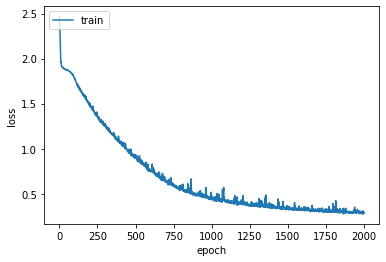

In [28]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [29]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8800
accuracy: 88.00%


In [30]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [31]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
